In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import seaborn as sns


In [62]:

test = pd.read_csv('test.csv', index_col="id")
train = pd.read_csv('train.csv', index_col="id")


train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


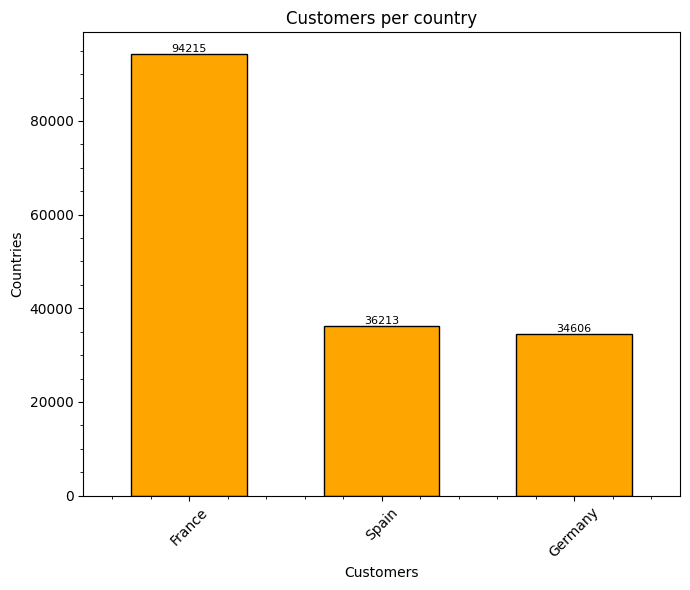

In [63]:
value_counts = train["Geography"].value_counts()

# Step 4: Plot the results using Matplotlib
plt.figure(figsize=(7, 6))
value_counts.plot(kind='bar', color='orange', edgecolor='black', width=0.6)  # Adjust the width as needed
plt.minorticks_on()

plt.title(f'Customers per country')
plt.xlabel('Customers')
plt.ylabel('Countries')

# Display exact values on the y-axis with adjusted y-position
for i, value in enumerate(value_counts):
    plt.text(i, value + 0.05, str(value), ha='center', va='bottom', fontsize=8)
    # You can adjust the value in 'value + 0.05' to move the text higher or lower

plt.xticks(rotation=45)
plt.tight_layout()

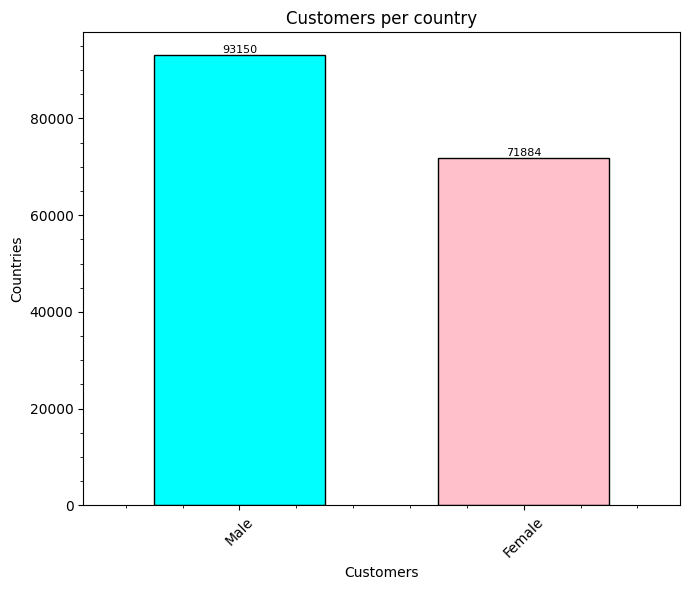

In [64]:
value_counts = train["Gender"].value_counts()

# Step 4: Plot the results using Matplotlib
plt.figure(figsize=(7, 6))

colors = ['cyan', 'pink']
value_counts.plot(kind='bar', color=colors, edgecolor='black', width=0.6)  # Adjust the width as needed
plt.minorticks_on()

plt.title(f'Customers per country')
plt.xlabel('Customers')
plt.ylabel('Countries')

# Display exact values on the y-axis with adjusted y-position
for i, value in enumerate(value_counts):
    plt.text(i, value + 0.05, str(value), ha='center', va='bottom', fontsize=8)
    # You can adjust the value in 'value + 0.05' to move the text higher or lower

plt.xticks(rotation=45)
plt.tight_layout()

In [65]:
train["Gender"] = train["Gender"].replace({"Male": 1, "Female": 0})
test["Gender"] = test["Gender"].replace({"Male": 1, "Female": 0})
train["Geography"] = train["Geography"].replace({"France": 1, "Germany": 2, "Spain": 3})
test["Geography"] = test["Geography"].replace({"France": 1, "Germany": 2, "Spain": 3})
train = train.drop(columns=["Surname"])
test = test.drop(columns=["Surname"])

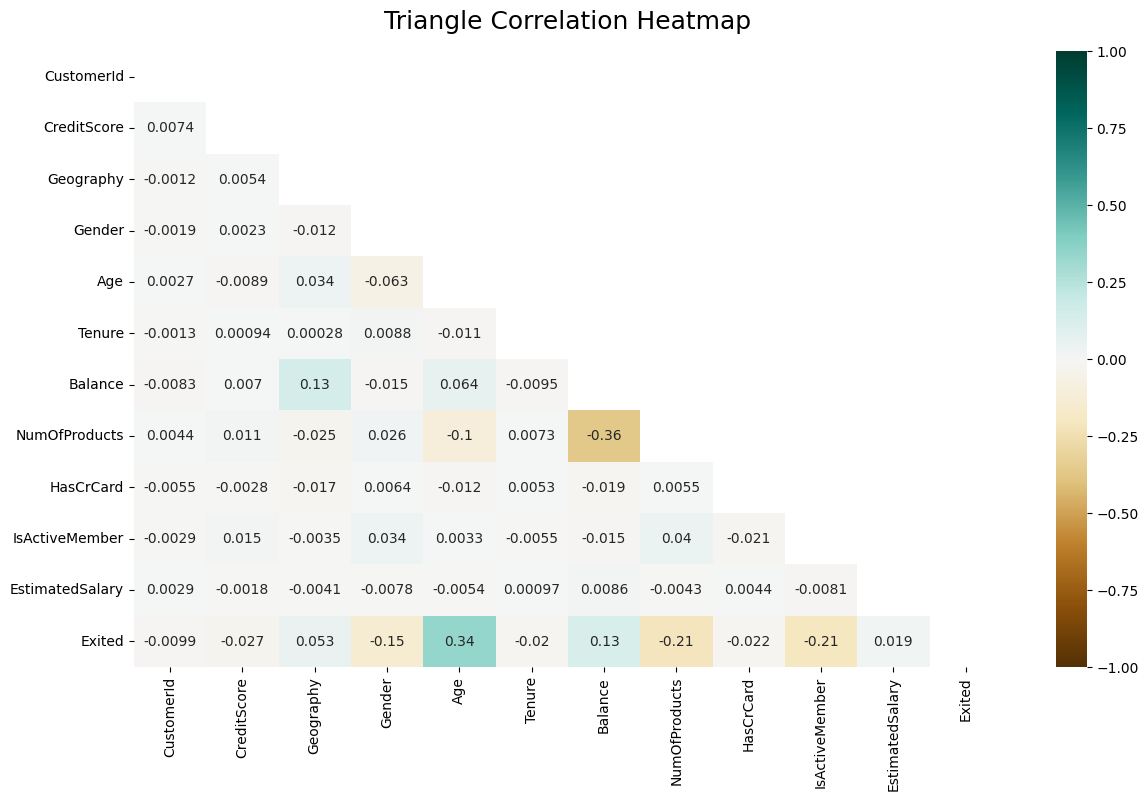

In [66]:
train.corr()

plt.figure(figsize=(14, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool_))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming 'train' is your training DataFrame
# Assuming 'test' is your testing DataFrame without the 'Exited' column

# Load the training data
X_train = train.drop(columns=['Exited'])
y_train = train['Exited']

# Load the test data
X_test = test

# Create a synthetic 'Id' column for the test data (using the DataFrame index)
X_test['Id'] = range(1, len(X_test) + 1)

# Extract the 'Id' column from the test data
test_ids = X_test['Id']

# Split the training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

# Make predictions on the test set
y_pred = model.predict(X_test.drop(columns=['Id']))  # Exclude 'Id' for prediction

# Create a DataFrame with 'Id' and 'Exited_Predicted'
submission_df = pd.DataFrame({'Id': test.index, 'Exited_Predicted': y_pred})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False, header=['id', 'Exited'])
